# **Project: Sentiment Analysis using Vanilla RNN**

**Goal:**  
Classify movie reviews as Positive (1) or Negative (0)

**Concepts Covered**
- Text tokenization
- Padding sequences
- Embedding layer
- Vanilla RNN
- Sequence-to-one classification
- Model training & evaluation

**Dataset**
> IMDb Movie Reviews
- 50,000 reviews
- Binary sentiment (positive / negative)
- Already preprocessed and labeled

### 1. Import Libraries

In [20]:
import tensorflow as tf
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

### 2. Load the IMDB dataset

- X_train, X_test: Lists of integers (each integer = a word index)
- y_train, y_test:
  - 1 → Positive review
  - 0 → Negative review


In [2]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


d:\Python\Projects\Sentiment Analysis using RNN\.venv\Lib\site-packages\numpy\lib\_format_impl.py:838: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  array = pickle.load(fp, **pickle_kwargs)


### 3. Padding Sequence
RNNs need same-length sequences.

Why padding?
- Reviews have different lengths
- Short reviews get zero-padded
- Long reviews get truncated

In [7]:
max_length = 200

X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

### 4. Build the Vanilla RNN Model

Layer Explanation
| Layer | Purpose |
| ------------- | ----------------------------------------- |
| **Embedding** | Converts word indices → dense vectors |
| **SimpleRNN** | Processes text sequentially |
| **Dense** | Outputs probability (positive / negative) |


In [10]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    SimpleRNN(64, activation='tanh'),
    Dense(1, activation='sigmoid')
])

d:\Python\Projects\Sentiment Analysis using RNN\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### 5. Compile the Model

Why these?
- Adam → fast & stable
- Binary Crossentropy → binary classification
- Accuracy → easy evaluation

In [11]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

### 6. Train the Model

In [12]:
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.6260 - loss: 0.6319 - val_accuracy: 0.6040 - val_loss: 0.6504
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.6941 - loss: 0.5871 - val_accuracy: 0.6912 - val_loss: 0.5760
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7237 - loss: 0.5370 - val_accuracy: 0.6574 - val_loss: 0.6195
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7886 - loss: 0.4488 - val_accuracy: 0.7598 - val_loss: 0.5320
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.8558 - loss: 0.3406 - val_accuracy: 0.7890 - val_loss: 0.4979


### 7. Evaluate on Test Data

In [13]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7892 - loss: 0.5061
Test Accuracy: 0.7892


### 8. Plot Training Results

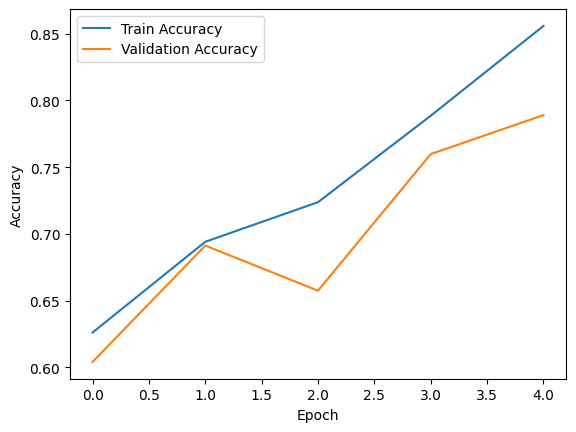

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 9. Predict Sentiment of New Text

In [19]:
word_index = imdb.get_word_index()

def encode_review(text):
    encoded = []
    for word in text.lower().split():
        if word in word_index and word_index[word] < vocab_size:
            encoded.append(word_index[word])
    return pad_sequences([encoded], maxlen=max_length)

review = "This movie was amazing and full of emotions"
encoded_review = encode_review(review)

prediction = model.predict(encoded_review)
print("Positive" if prediction[0][0] > 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Negative


### 10. LSTM Model

In [21]:
lstm_model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

lstm_history = lstm_model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test)
print("LSTM Accuracy:", lstm_acc)

Epoch 1/5


d:\Python\Projects\Sentiment Analysis using RNN\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 113ms/step - accuracy: 0.7988 - loss: 0.4264 - val_accuracy: 0.8584 - val_loss: 0.3382
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.9069 - loss: 0.2379 - val_accuracy: 0.8506 - val_loss: 0.3452
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.9324 - loss: 0.1808 - val_accuracy: 0.8516 - val_loss: 0.3400
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.9518 - loss: 0.1316 - val_accuracy: 0.8672 - val_loss: 0.3767
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.9706 - loss: 0.0870 - val_accuracy: 0.8566 - val_loss: 0.5255
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.8458 - loss: 0.5676
LSTM Accuracy: 0.8458399772644043


### 11. GRU Model

In [22]:
gru_model = Sequential([
    Embedding(vocab_size, 128, input_length=max_length),
    GRU(64),
    Dense(1, activation='sigmoid')
])

gru_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

gru_history = gru_model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

gru_loss, gru_acc = gru_model.evaluate(X_test, y_test)
print("GRU Accuracy:", gru_acc)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 115ms/step - accuracy: 0.7614 - loss: 0.4681 - val_accuracy: 0.8352 - val_loss: 0.3765
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step - accuracy: 0.8924 - loss: 0.2649 - val_accuracy: 0.8614 - val_loss: 0.3489
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step - accuracy: 0.9342 - loss: 0.1765 - val_accuracy: 0.8736 - val_loss: 0.3191
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 105ms/step - accuracy: 0.9603 - loss: 0.1119 - val_accuracy: 0.8672 - val_loss: 0.3723
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.9752 - loss: 0.0743 - val_accuracy: 0.8672 - val_loss: 0.4523
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8586 - loss: 0.4905
GRU Accuracy: 0.8586400151252747


### 12. Model Save

In [23]:
gru_model.save("model/sentiment_analysis.keras")